In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


Import the dataset

In [3]:
df = pd.read_csv("dataset.csv")
print(df)

     Patient Id  Patient Age Genes in mother's side Inherited from father  \
0     PID0x4108          9.0                    Yes                    No   
1     PID0x79da         13.0                     No                    No   
2     PID0x2027         11.0                    Yes                    No   
3      PID0xb53          3.0                     No                   Yes   
4     PID0x8d3b          7.0                     No                    No   
...         ...          ...                    ...                   ...   
2429  PID0x7e53         12.0                     No                    No   
2430  PID0x7b6f          8.0                    Yes                    No   
2431  PID0x68b5          5.0                    Yes                    No   
2432  PID0x5037          2.0                     No                    No   
2433  PID0x1b43          1.0                     No                   Yes   

     Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name

In [4]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

Drop the irrevalent columns

In [5]:
# Drop irrelevant columns
columns_to_drop = [
    'Patient Id', 'Patient First Name', 'Family Name', "Father's name",
    'Institute Name', 'Location of Institute', 'Genetic Disorder Name'
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

Define the target column

In [6]:
target_col = 'Genetic Disorder'

 Detect numeric and categorical columns

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

 Replace placeholder values with np.nan

In [8]:

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(-99, np.nan)

    
for col in categorical_cols:
    df[col] = df[col].replace('-99', np.nan)


Encode Categorical Columns

In [9]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


scaler = StandardScaler()

Scale numerical Features

In [10]:

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


drop all null values

In [11]:
df.dropna(inplace=True)

In [12]:
# Summary
print("Preprocessing complete.")
print(f"Target column: {target_col}")

Preprocessing complete.
Target column: Genetic Disorder


In [13]:
feature_columns = [col for col in df.columns if col != target_col]


print(" Final dataset preview:")
print(df.head())


 Final dataset preview:
    Patient Age  Genes in mother's side  Inherited from father  Maternal gene  \
13    -1.596193                       0                      0              0   
15    -1.596193                       0                      1              0   
16     0.003335                       1                      2              1   
37    -0.225169                       1                      2              1   
51    -0.453673                       1                      0              1   

    Paternal gene  Blood cell count (mcL)  Mother's age  Father's age  Status  \
13              0               -0.174001      1.436300     -1.238467       1   
15              0               -1.378692     -0.764292      1.551014       0   
16              0               -0.066973     -0.264158      0.621187       1   
37              0                0.540989      0.035923     -1.470924       0   
51              1               -0.523701     -0.864319      0.001302       0   

  

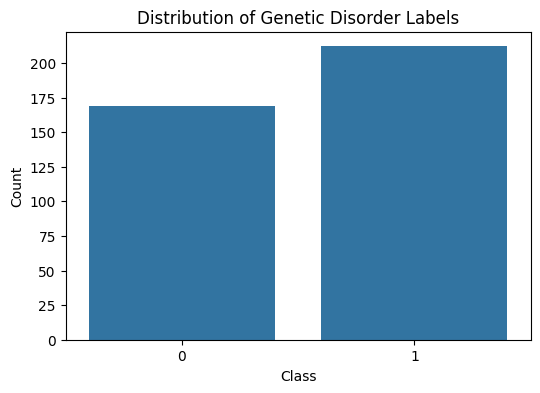

<Figure size 1400x1000 with 0 Axes>

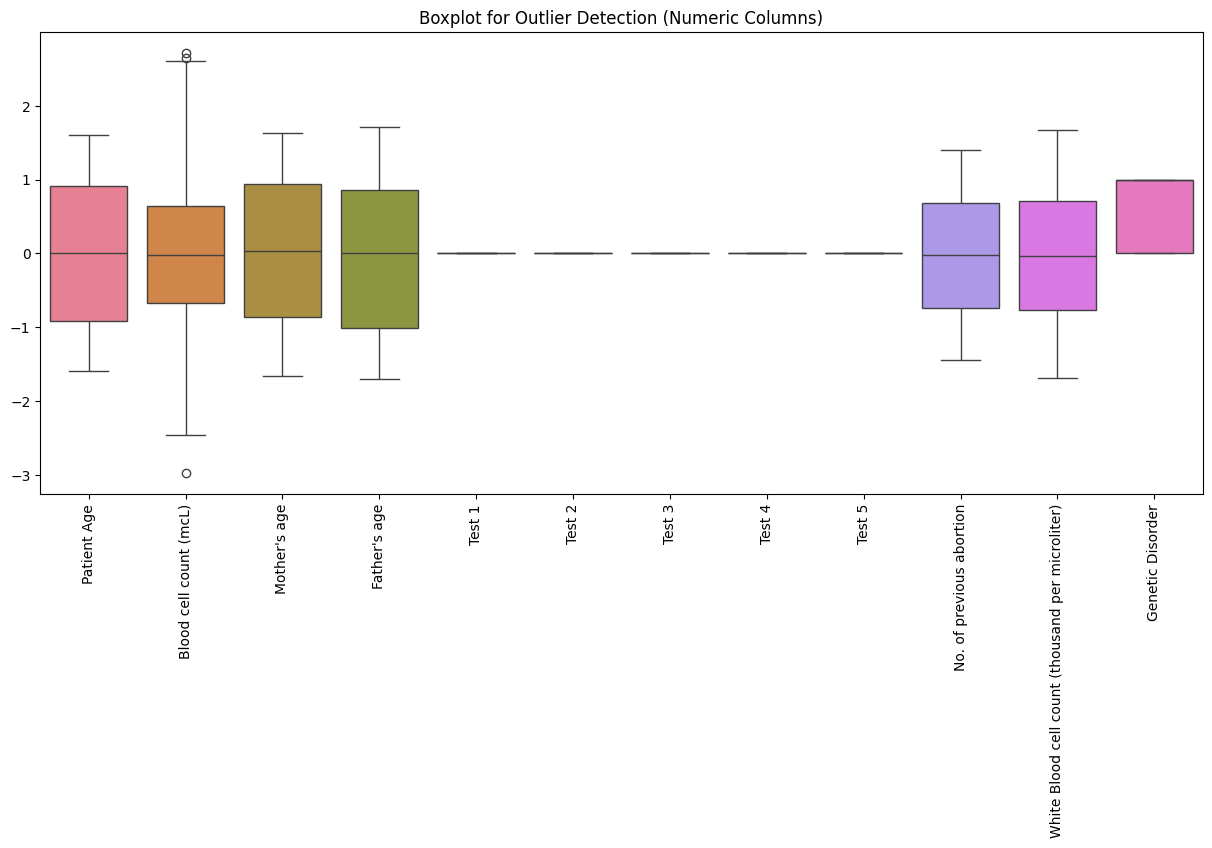

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Genetic Disorder')  
plt.title("Distribution of Genetic Disorder Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(14, 10))
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(15, 6))
sns.boxplot(data=numeric_data)
plt.title("Boxplot for Outlier Detection (Numeric Columns)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
Random Forest

Random Forest  Accuracy: 0.9565, Precision: 0.9578, Recall: 0.9565, F1-Score: 0.9565


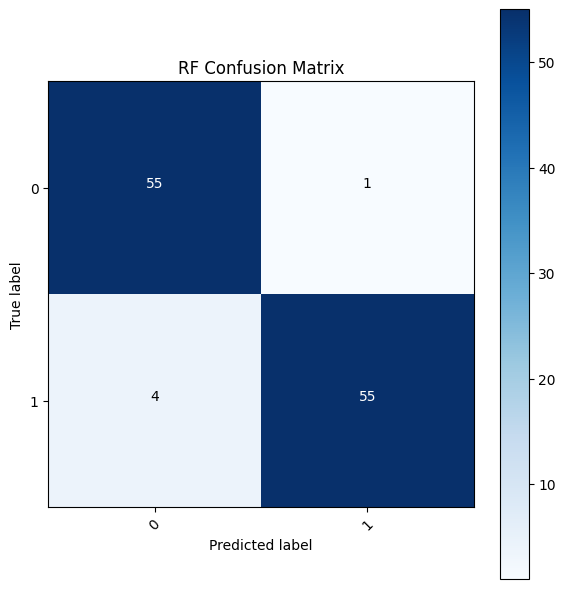

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)


X = df[feature_columns].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("Random Forest ",
      f"Accuracy: {accuracy_score(y_test,y_pred):.4f},",
      f"Precision: {precision_score(y_test,y_pred,average='weighted'):.4f},",
      f"Recall: {recall_score(y_test,y_pred,average='weighted'):.4f},",
      f"F1-Score: {f1_score(y_test,y_pred,average='weighted'):.4f}")


cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RF Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
Logistic Regression

Logistic Regression → Accuracy: 0.9091, Precision: 0.9093, Recall: 0.9091, F1-Score: 0.9090


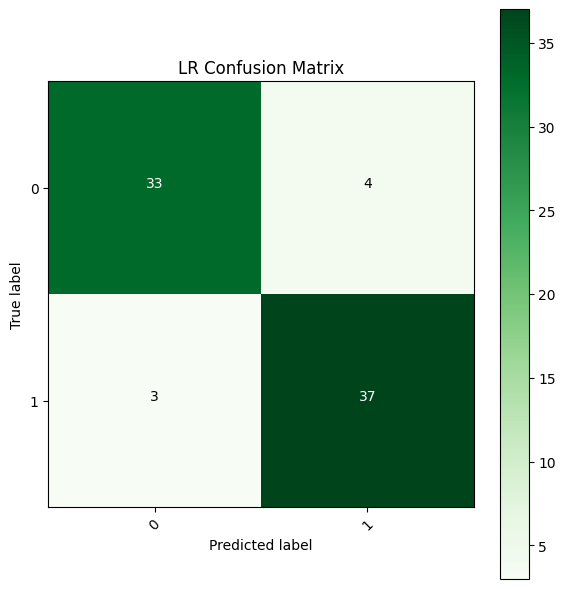

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)


X = df[feature_columns].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("Logistic Regression →",
      f"Accuracy: {accuracy_score(y_test,y_pred):.4f},",
      f"Precision: {precision_score(y_test,y_pred,average='weighted'):.4f},",
      f"Recall: {recall_score(y_test,y_pred,average='weighted'):.4f},",
      f"F1-Score: {f1_score(y_test,y_pred,average='weighted'):.4f}")


cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("LR Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
CNN

Epoch 1/20


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5839 - loss: 0.7011  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6334 - loss: 0.6425 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7515 - loss: 0.6061 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5715 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.5484 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.5535 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7588 - loss: 0.5175 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.4266 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.4160 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8504 - loss: 0.3799 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3680 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - l

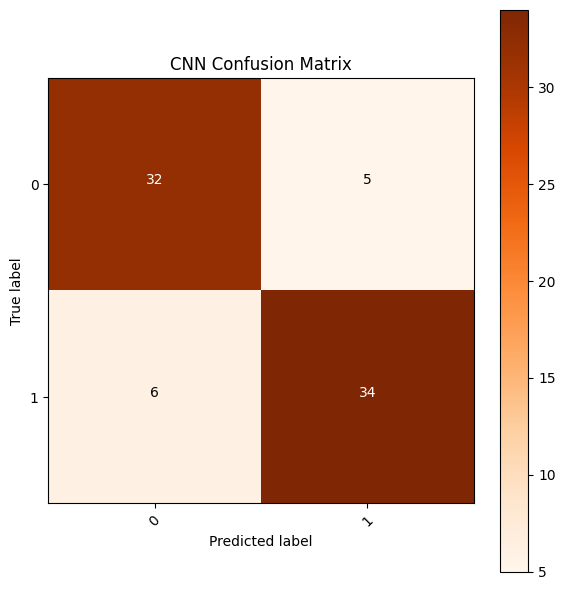

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


X = df[feature_columns].astype(np.float32).to_numpy()       
y = df[target_col].astype(np.int32).to_numpy()             

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


n_features = X_train.shape[1]
X_train_cnn = X_train.reshape(-1, n_features, 1)
X_test_cnn  = X_test.reshape(-1,  n_features, 1)

# build model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features,1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)

# predict
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)

# print metrics
print("1D-CNN →",
      f"Accuracy: {accuracy_score(y_test,y_pred):.4f},",
      f"Precision: {precision_score(y_test,y_pred,average='weighted'):.4f},",
      f"Recall: {recall_score(y_test,y_pred,average='weighted'):.4f},",
      f"F1-Score: {f1_score(y_test,y_pred,average='weighted'):.4f}")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title("CNN Confusion Matrix")
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             ha='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
CNN + LSTM

Epoch 1/100


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5225 - loss: 0.6927
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5323 - loss: 0.6929 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5663 - loss: 0.6822 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5708 - loss: 0.6817 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5614 - loss: 0.6818 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5834 - loss: 0.6726 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5453 - loss: 0.6875 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5588 - loss: 0.6817 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5557 - loss: 0.6809 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5657 - loss: 0.6800 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5973 - loss: 0.6675 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

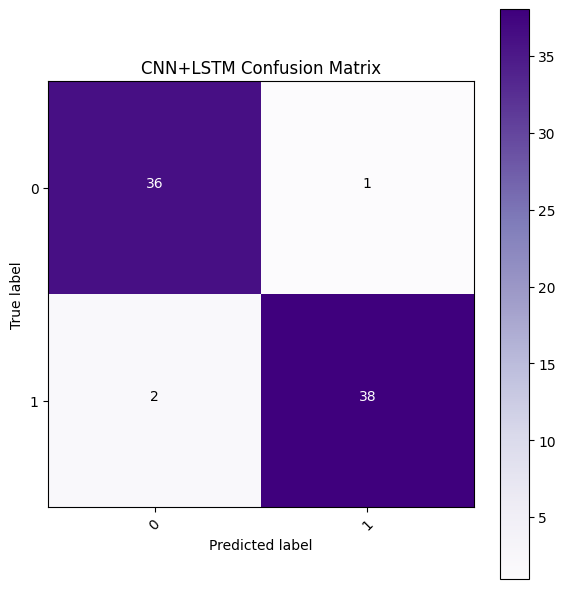

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense


X = df[feature_columns].astype(np.float32).to_numpy()  
y = df[target_col].astype(np.int32).to_numpy()        

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


n_features = X_train.shape[1]
X_train_seq = X_train.reshape(-1, n_features, 1)
X_test_seq  = X_test.reshape(-1,  n_features, 1)


model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_features,1)),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train_seq, y_train, epochs=100, batch_size=32, verbose=1)


y_pred = np.argmax(model.predict(X_test_seq), axis=1)


print("CNN+LSTM →",
      f"Accuracy: {accuracy_score(y_test, y_pred):.4f},",
      f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f},",
      f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f},",
      f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title("CNN+LSTM Confusion Matrix")
plt.colorbar()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             ha='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
Random Forest + Gradient Boosting

RF+GB Ensemble → Accuracy: 0.9877, Precision: 0.9879, Recall: 0.9877, F1-Score: 0.9877


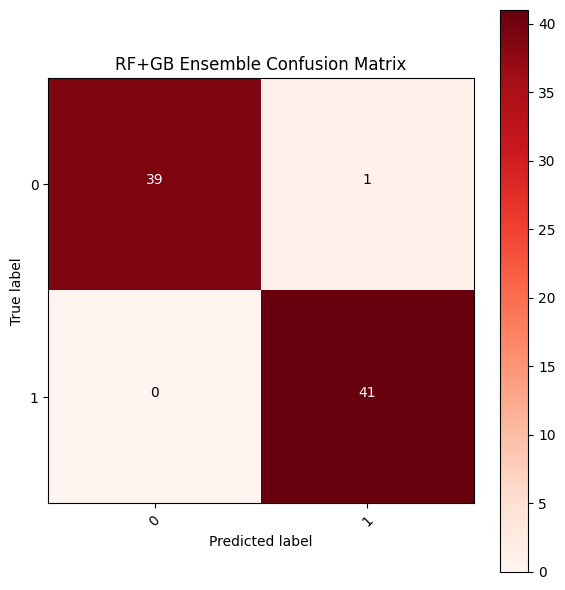

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)


X = df[feature_columns].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.21, random_state=42
)


ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)


print("RF+GB Ensemble →",
      f"Accuracy: {accuracy_score(y_test,y_pred):.4f},",
      f"Precision: {precision_score(y_test,y_pred,average='weighted'):.4f},",
      f"Recall: {recall_score(y_test,y_pred,average='weighted'):.4f},",
      f"F1-Score: {f1_score(y_test,y_pred,average='weighted'):.4f}")


cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("RF+GB Ensemble Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
